# Importing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_data=pd.read_csv("C:/Users/admin/Downloads/titanic/train.csv")

In [3]:
titanic_data.shape

(891, 12)

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# avoiding the null values in AGE

In [8]:
titanic_data["Age"]=titanic_data["Age"].fillna(titanic_data["Age"].median())

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Graph of Survival v/s Death of Male and Female

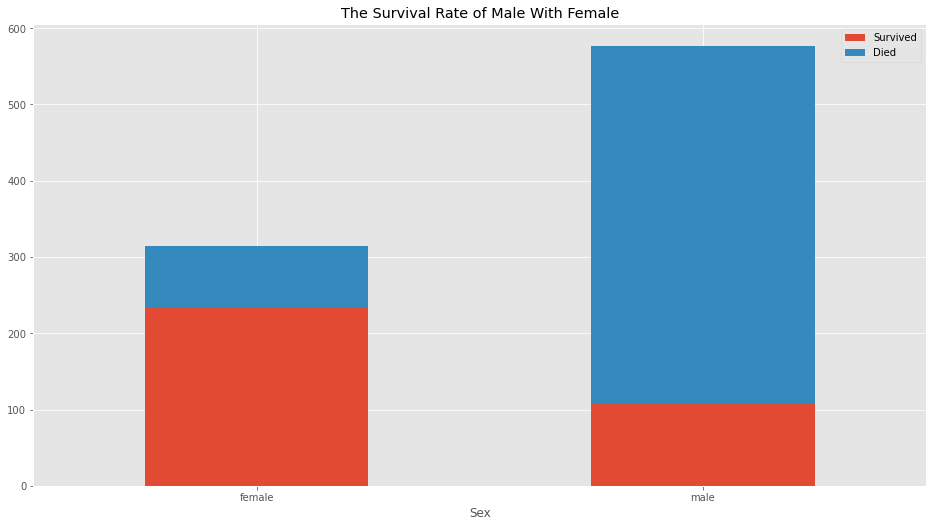

In [10]:
plt.style.use("ggplot")
titanic_data['Died'] = 1 - titanic_data['Survived']
titanic_data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(16, 8.5),stacked=True)
plt.title("The Survival Rate of Male With Female")
plt.xticks(rotation=0)
plt.show()

# Age based survival

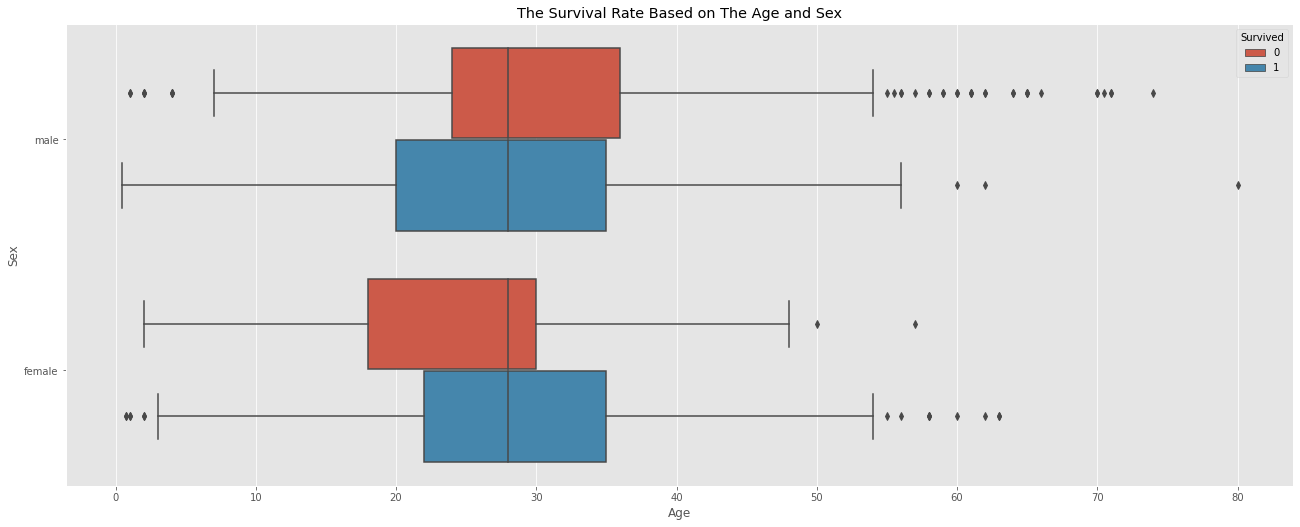

In [11]:
fig = plt.figure(figsize=(22, 8.5))
sns.boxplot(x="Age",y="Sex",data=titanic_data,hue="Survived")
plt.title("The Survival Rate Based on The Age and Sex")
plt.show()

# survival rate based on the fare and age

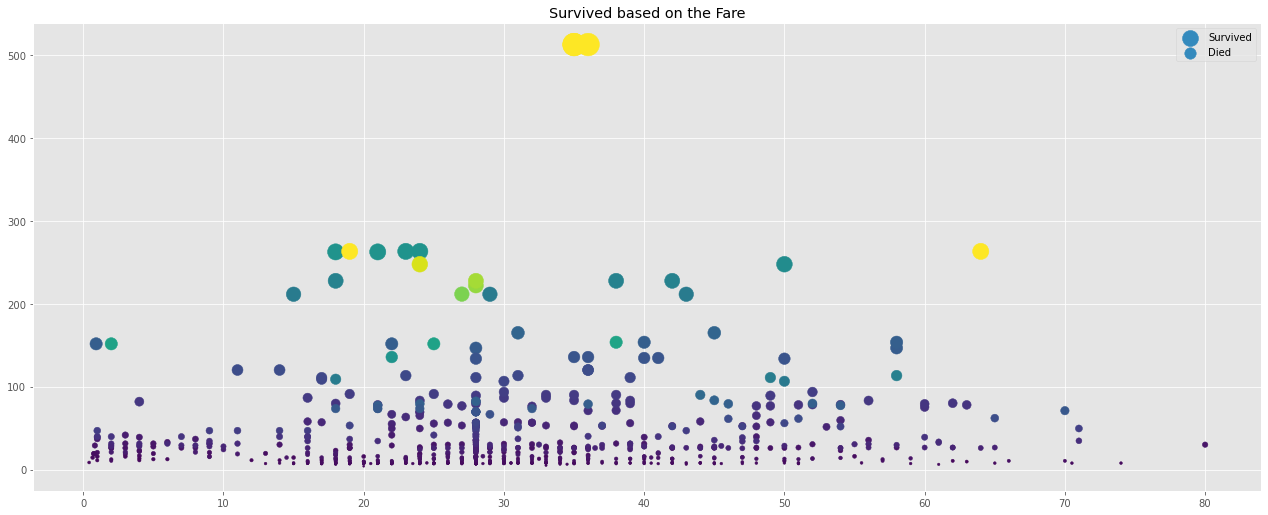

In [12]:
plt.figure(figsize=(22,8.6))
ax = plt.subplot()
ax.scatter(titanic_data[titanic_data['Survived'] == 1]['Age'],titanic_data[titanic_data['Survived'] == 1]['Fare'],label="Survived",
           c=titanic_data[titanic_data['Survived'] == 1]['Fare'], s=titanic_data[titanic_data['Survived'] == 1]['Fare'])
ax.scatter(titanic_data[titanic_data['Survived'] == 0]['Age'],titanic_data[titanic_data['Survived'] == 0]['Fare'],label="Died",
           c=titanic_data[titanic_data['Survived'] == 0]['Fare'], s=titanic_data[titanic_data['Survived'] == 0]['Fare'])
ax.legend()
plt.title("Survived based on the Fare")
plt.show()


# survival rate based on the class

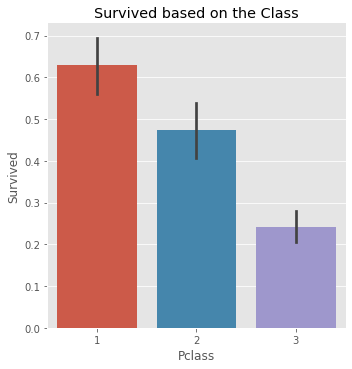

In [13]:
sns.catplot(x="Pclass",y="Survived",kind="bar",data=titanic_data)
plt.title("Survived based on the Class")
plt.show()

# Prediction 

In [14]:
y=titanic_data['Survived']
predict_pass=titanic_data["PassengerId"]

In [15]:
X=titanic_data.drop(["PassengerId","Survived","Name","Ticket","Embarked",'Cabin','Died'],axis=1)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [17]:
X.shape

(891, 6)

In [18]:
X.dtypes

Pclass      int64
Sex        object
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
Encoder_Sex=LabelEncoder()
X["Sex"]=Encoder_Sex.fit_transform(X["Sex"])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int32  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 38.4 KB


In [21]:
X['Age']=X['Age'].astype("int64")

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int32  
 2   Age     891 non-null    int64  
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(1), int32(1), int64(4)
memory usage: 38.4 KB


# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Support vector Classifier

In [25]:
from sklearn.svm import SVC
model=SVC(kernel="poly",degree=5)
model.fit(X_train,y_train)

SVC(degree=5, kernel='poly')

# Score

In [26]:
model.score(X_test,y_test)

0.8116591928251121

In [27]:
titanic_test=pd.read_csv("C:/Users/admin/Downloads/titanic/test.csv")

In [28]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [29]:
test_pass=titanic_test["PassengerId"]
titanic_test=titanic_test.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1)

In [30]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [31]:
titanic_test["Age"]=titanic_test["Age"].fillna(titanic_data["Age"].median())
titanic_test["Fare"]=titanic_test["Fare"].fillna(titanic_data["Fare"].median())

In [32]:
from sklearn.preprocessing import LabelEncoder
Encoder_Sex=LabelEncoder()
titanic_test["Sex"]=Encoder_Sex.fit_transform(titanic_test["Sex"])
titanic_test['Age']=titanic_test['Age'].astype("int64")
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int32  
 2   Age     418 non-null    int64  
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
dtypes: float64(1), int32(1), int64(4)
memory usage: 18.1 KB


In [33]:
titanic_test["test_survival"]=model.predict(titanic_test)

In [34]:
titanic_test

,Pclass,Sex,Age,SibSp,Parch,Fare,test_survival
0,3,1,34,0,0,7.8292,0
1,3,0,47,1,0,7.0000,0
2,2,1,62,0,0,9.6875,0
3,3,1,27,0,0,8.6625,0
4,3,0,22,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,1,28,0,0,8.0500,0
414,1,0,39,0,0,108.9000,1
415,3,1,38,0,0,7.2500,0
416,3,1,28,0,0,8.0500,0


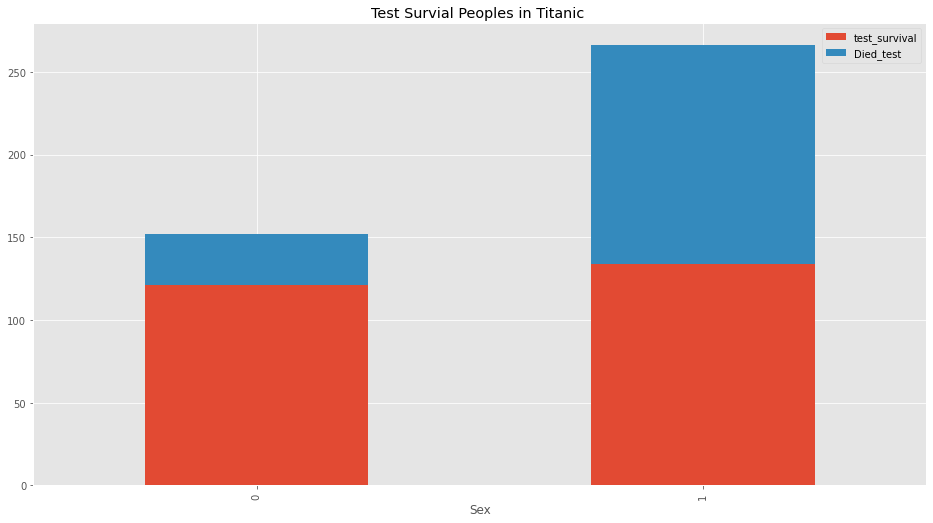

In [35]:
titanic_test['Died_test'] = 1 - titanic_test['test_survival']
titanic_test.groupby('Sex').agg('sum')[['test_survival', 'Died_test']].plot(kind='bar', figsize=(16, 8.5),stacked=True)
plt.title("Test Survial Peoples in Titanic ")
plt.show()